In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [4]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with = engine)

In [9]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [10]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [11]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [20]:
# Find the most recent date in the data set.
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
recent_date

'2017-08-23'

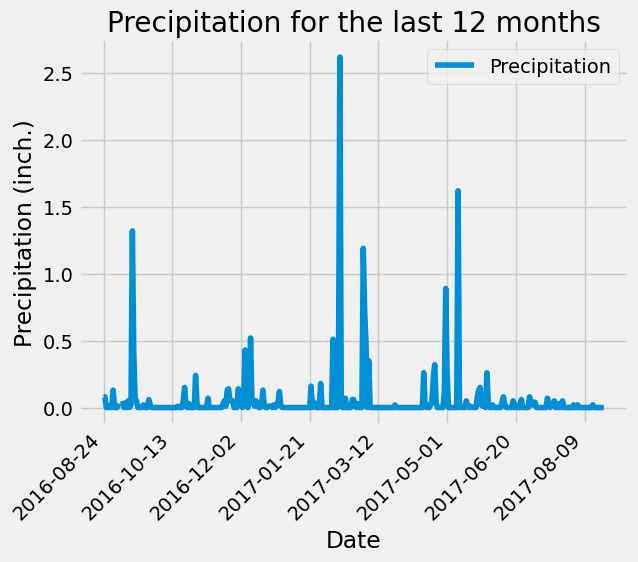

In [86]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
last_year = dt.datetime.strptime(recent_date, '%Y-%m-%d') - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= last_year).\
    group_by(Measurement.date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp, columns =['Date', 'Precipitation'])
prcp_df.set_index('Date', inplace=True)
prcp_df.head()
# Sort the dataframe by date
#Already sorted by "Group by"

# Use Pandas Plotting with Matplotlib to plot the data
prcp_df.plot()
plt.tight_layout()
plt.xticks(rotation=45, ha='right')
plt.xlabel('Date')
plt.ylabel('Precipitation (inch.)')
plt.title('Precipitation for the last 12 months')
plt.savefig("./Precipitation.png")
plt.show()

In [87]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,Precipitation
count,363.000000
mean,0.048843
std,0.205197
min,0.000000
25%,0.000000
50%,0.000000
75%,0.020000
max,2.620000


# Exploratory Station Analysis

In [44]:
# Design a query to calculate the total number of stations in the dataset
total = session.query(Station.id).count()
total

9

In [59]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [65]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_station = session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == active[0][0]).all()
active_station

[(54.0, 85.0, 71.66378066378067)]

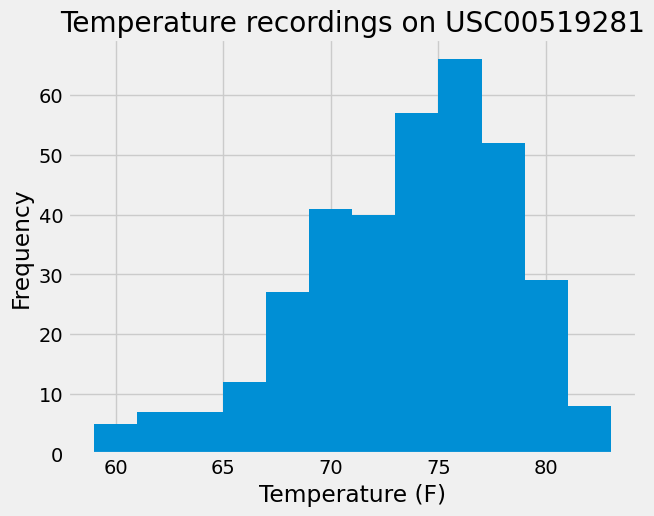

In [88]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temperature = session.query(Measurement.station, Measurement.date, Measurement.tobs).filter(Measurement.station == active[0][0]).\
    filter(Measurement.date >= last_year).all()
temp_df = pd.DataFrame(temperature, columns = ['Station', 'Date', 'Temperature'])
temp_df.set_index('Station', inplace = True)
temp_df['Temperature']
plt.hist(temp_df['Temperature'], bins = 12)
plt.tight_layout()
plt.xlabel('Temperature (F)')
plt.ylabel('Frequency')
plt.title('Temperature recordings on USC00519281')
plt.savefig("./Temperatures.png")
plt.show()


# Close Session

In [89]:
# Close Session
session.close()